# Image Decomposition via Singular Value Decomposition (SVD)

### Objective
This project solves a dimensionality reduction problem. Instead of utilizing high-level libraries, SVD is derived manually to showcase the relationship between matrix factorization and data compression.

### Mathematical Methodology:
* **Eigen-Decomposition:** Deriving the Left ($U$) and Right ($V^T$) singular vectors by performing eigenvalue decomposition on the covariance matrices $GG^T$ and $G^TG$.
* **Low-Rank Approximation:** Reconstructing the image using only the top $r$ singular values to retain maximum variance while minimizing storage requirements.
* **Numerical Stability:** Utilizing `np.linalg.eigh` to ensure real-valued outputs for symmetric matrices, a crucial step for handling large-scale financial datasets or high-resolution images.

### Financial Relevance:
The logic used here for image compression is identical to **Principal Component Analysis (PCA)**, which is used in finance for portfolio risk factor modeling and identifying latent signals in market noise.

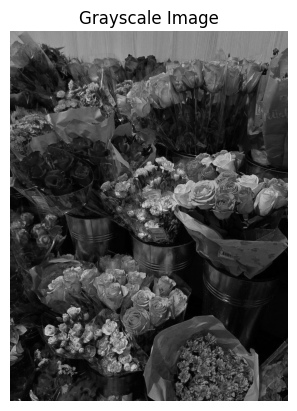

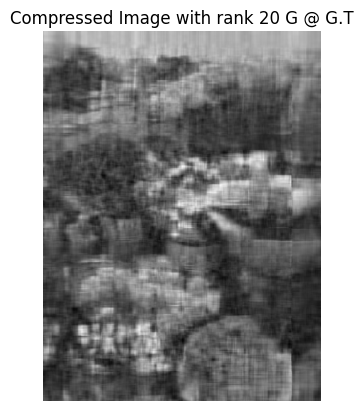

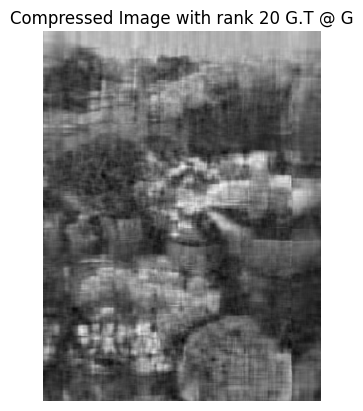

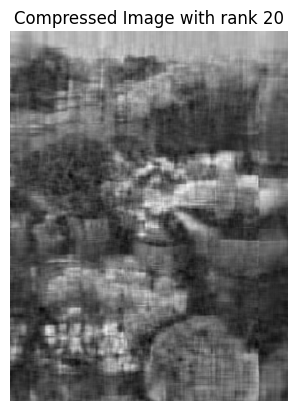

In [9]:
#Image decomposition as a direct application of SVD 
import numpy as np
import matplotlib.pyplot as plt
import time

# G = np.array([[1,2,3],[4,5,6]])
photo_data = plt.imread("flowers.jpg")
G = np.mean(photo_data, -1)
img = plt.imshow(G)
img.set_cmap('gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


### PART (1)

# Compute G @ G.T
G_GT = G @ G.T
# Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(G_GT)
# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
# Compute the singular values and invert them
singular_values = np.sqrt(eigenvalues)
inv_singular_values = 1.0 / singular_values
# Compute the U and Vt matrices
U = eigenvectors
S = singular_values
S_G = np.diag((S))
V = G.T @ eigenvectors @ np.diag(inv_singular_values)
Vt = V.T

# U: Left singular vectors
# S: Singular values
# Vt: Right singular vectors (transposed)

r = 20
compressed_U = U[:, :r]
compressed_Vt = Vt[:r, :]
compressed_S = S_G[0:r, :r]

# G = U_G @ S_G @ V_G
compressed_image = np.dot(np.dot(compressed_U, compressed_S), compressed_Vt)

img = plt.imshow(np.real(compressed_image)) 
img.set_cmap('gray')
plt.title(f"Compressed Image with rank {r} G @ G.T")
plt.axis('off')
plt.show()
time.sleep(1)


### PART (2)

# Compute G.T @ G
GT_G = G.T @ G
# Perform eigenvalue decomposition
eigenvalues_GT_G, eigenvectors_GT_G = np.linalg.eigh(GT_G)
sorted_indices_GT_G = np.argsort(eigenvalues_GT_G)[::-1]
eigenvalues_GT_G = eigenvalues_GT_G[sorted_indices_GT_G]
eigenvectors_GT_G = eigenvectors_GT_G[:, sorted_indices_GT_G]
singular_values_GT_G = np.sqrt(eigenvalues_GT_G)
inv_singular_values_GT_G = 1.0 / singular_values_GT_G
U = G @ eigenvectors_GT_G @ np.diag(inv_singular_values_GT_G)
V = eigenvectors_GT_G
Vt = V.T
S = singular_values_GT_G
S_G = np.diag((S))

# U: Left singular vectors
# S: Singular values
# Vt: Right singular vectors (transposed)

r = 20
compressed_U = U[:, :r]
compressed_Vt = Vt[:r, :]
compressed_S = S_G[0:r, :r]

# G = U_G @ S_G @ V_G
compressed_image = np.dot(np.dot(compressed_U, compressed_S), compressed_Vt)

img = plt.imshow(np.real(compressed_image))
img.set_cmap('gray')
plt.title(f"Compressed Image with rank {r} G.T @ G")
plt.axis('off')
plt.show()
time.sleep(1)


### PART (3)

U = eigenvectors
S = singular_values
S_G = np.diag((S))
V = eigenvectors_GT_G
Vt = V.T

# U: Left singular vectors
# S: Singular values
# Vt: Right singular vectors (transposed)

r = 20
compressed_U = U[:, :r]
compressed_S = S_G[0:r, :r]
compressed_Vt = Vt[:r, :]

C_out = np.dot(np.dot(compressed_U, compressed_S), compressed_Vt)
    
img = plt.imshow(np.real(compressed_image)) 
img.set_cmap('gray')
plt.title(f"Compressed Image with rank {r}")
plt.axis('off')
plt.show()
time.sleep(1)